# Isogeometric analysis of the time-dependent Nonlinear Poisson equation



This section is devoted to using the isogeometric analysis for the numerical approximation of the poisson equation equation to ensure a regularity needed. For numerical accuracy we integrate in time using ***generalized-$\alpha$ method***.

***However, the generalized-$\alpha$ method is implemented differently from the one found in the literature. Still, here we test the exact replacement of the unknown to compute a solution at the next step.***

## 1. Nonlinear Poisson Equation

  Let $\Omega\subset\mathbb{R}^d$ be an open set with sufficiently smooth boundary, denoted by $\Gamma$, where $d$ is the number of spatial dimensions. Then, the problem stated in strong form as :

Find $\mathbf{c} :\overline{\Omega}\times(0,T)\longmapsto\mathbb{R}$ such that 
## $	\begin{align*}
		\left\lbrace\begin{array}{lll}
			\dfrac{\partial \mathbf{c}}{\partial t} ~~~~~=~ \nabla \cdot \big( (1 + \mathbf{c}^2)\nabla\mathbf{c}\big)  + f&\text{ in } \Omega\times(0,T) ,~~~~~~~~~~(1)\\
		    \mathbf{c}~~~~~~~~ =~ g &\text{ on } \Gamma_g\times(0,T),~~~~~~~~(2)\\
            \mathbf{c}(x,0)  = \mathbf{c}_0(x) &\text{ in } \overline{\Omega},~~~~~~~~~~~~~~~~~~~~~~~~(5)\\         
		\end{array}\right.
	\end{align*}$

## 2. Variational form and semidiscrete formulation

Let X be the functional space and $\big(.,.\big)_\Omega$ denote the $L^2$ inner product with respect to  $\Omega$. The variational formulation is stated as follows :

Find $\mathbf{c}\in X$, such that $\forall~w\in X$ : 

$$\textbf{B}\big(w;\mathbf{c},\mathbf{c}\big) = \mathbf{L}(w) ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(8)$$

with

$$\begin{align*}\textbf{B}\big(w;\mathbf{c},v\big) &= \big(\nabla
w,(1+\mathbf{v})\nabla\mathbf{c}\big)_\Omega.~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(9)\\
\textbf{L}\big(w\big) &= \big(w,f\big)_\Omega .~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(10)
\end{align*}$$

The space discretization of (11) leads to the following variational problem over the finite element spaces : 

Find $\mathbf{c}^h \in X^h\subset X$, such that $\forall~w^h \in X^h$ : 

$$\textbf{B}\big(w^h;\mathbf{c}^h, \mathbf{c}^h\big) = 0 ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(10)$$

where 

$$\mathbf{c}^h = \sum_{i=1}^{n_b} \mathbf{c}_iN_i, ~~~ w^h = \sum_{i=1}^{n_b} w_iN_i~~~~~~~~~~~~~~~~~~(11)$$

$n_b$ is the dimension of discrete space.

## 3. Time discretization using the generalized-$\alpha$ method

Let $c$ and $\dot{c}$ denote the vector of global degrees of freedom and its time derivative, respectively. We define the following residual vectors :
$$\mathbf{R}^c = \Big\{R_i\Big\}$$
$$R_i = \mathbf{B}\big(N_i, \mathbf{c}^h\big)$$
where we denote by $e_j$ is the j-th cartesian basis vector.

Given $\mathbf{c}_n$, $\dot{\mathbf{c}}_n$ at the $n^{th}$ time $t_n$ and $\Delta t_n = t_{n+1}-t_n$ the time step size, the generalized-$\alpha$ method involves finding $\dot{\mathbf{c}}_{n+1}$, $\mathbf{c}_{n+1}$, $\mathbf{c}_{n+\alpha_m}$, $\mathbf{c}_{n+\alpha_f}$ such that

$$\begin{align*}
  \mathbf{R}\big(\dot{\mathbf{c}}_{n+\alpha_m}, \mathbf{c}_{n+\alpha_f}\big) &=0,~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(12)\\
  \mathbf{c}_{n+1} &= \mathbf{c}_{n} + \Delta t_n \dot{\mathbf{c}}_{n} + \gamma \Delta t_n \big(\dot{\mathbf{c}}_{n+1} - \dot{\mathbf{c}}_{n}\big),~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(13)\\
  \dot{\mathbf{c}}_{n+\alpha_m} &= \dot{\mathbf{c}}_{n} + \alpha_m \big( \dot{\mathbf{c}}_{n+1} - \dot{\mathbf{c}}_{n}\big),~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(14)\\
  \mathbf{c}_{n+\alpha_f}  &= \mathbf{c}_{n} + \alpha_f \big( \mathbf{c}_{n+1} - \mathbf{c}_{n}\big)~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(15)
 \end{align*}$$
 
 where $\alpha_m$ , $\alpha_f$ and $\gamma$ are real-valued parameters that define the method.

Jansen, Whiting and Hulbert proved that, the generalized-$\alpha$ method is second-order accurate if and only if 
$$\gamma = \dfrac{1}{2} + \alpha_m -\alpha_f,~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(16)$$
and it is unconditionally stable if and only if 
$$\alpha_m \geq \alpha_f \geq \dfrac{1}{2}.~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(17)$$ 
Hence, if (20) holds, then (17) becomes $$\mathbf{c}_{n+1} = \mathbf{c}_{n} + \Delta t_n\Big( \dot{\mathbf{c}}_{n + \alpha_m} + \big(\alpha_f-\dfrac{1}{2}\big)\dot{\mathbf{c}}_{n} - \big(\alpha_f-\dfrac{1}{2}\big)\dot{\mathbf{c}}_{n+1}\Big),~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~(18)$$

The parameters $\alpha_m$ and $\alpha_f$ can be chosen to be equal to

$$\alpha_m = \dfrac{1}{2}\big( \dfrac{3-\rho_\infty}{1+\rho_\infty}\big)$$

$$\alpha_m = \dfrac{1}{1+\rho_\infty}$$
where $\rho_\infty\in [0,1]$ is the spectral radius of the amplification matrix as $\Delta t \rightarrow \infty$, controls high-frequency dissipation.

 # 4. Non-linear solver using Newton's method 

We approximate the non-linear system of equation (15-16) using Newton's method which leads to the following algorithm :

1. Set 
  $$ \mathbf{c}_{n+\alpha_f, (0)} = \mathbf{c}_n$$
  
2. From the (12)-(13)-(14)-(15) we have the following system at the $\alpha$-levels
 
 $$ \alpha_m\big( \mathbf{c}_{n+\alpha_f}, w\big)_{\Omega} +  \gamma \Delta t \alpha_f \big((1+\mathbf{c}_{n+\alpha_f}^2)\nabla \mathbf{c}_{n+\alpha_f}, w\big)_{\Omega} = \gamma \Delta t \alpha_f \big(f, w\big) + \alpha_m\big(\mathbf{c}_{n}, w\big) + \alpha_f\Delta t(\alpha_m-\gamma)\big(\dot{\mathbf{c}}_n,w\big)$$
 
  ##### b- Newton Method

Let's define 
$$
F(v;u) := G(v;u,u) -l(v), \quad \forall v \in \mathcal{V}
$$

where
 $$ G(v;u,u) = \alpha_m\big( u, v\big)_{\Omega} +  \gamma \Delta t \alpha_f \big((1+u^2)\nabla u, v\big)_{\Omega}$$
 
 and
 
 $$ L(v)= \gamma \Delta t \alpha_f \big(f, v\big) + \alpha_m\big(\mathbf{c}_{n}, v\big) + \alpha_f\Delta t(\alpha_m-\gamma)\big(\dot{\mathbf{c}}_n,v\big)$$

Newton method writes
$$
\mbox{Find } \mathbf{c}_{n+\alpha_f, (k)} \in \mathcal{V}_h, \mbox{such that}\\
F^{\prime}(\delta \mathbf{c},v; \mathbf{c}_{n+\alpha_f, (k-1)}) = - F(v;\mathbf{c}_{n+\alpha_f, (k-1)}), \quad \forall v \in \mathcal{V} \\
\mathbf{c}_{n+\alpha_f, (k)} := \mathbf{c}_{n+\alpha_f, (k-1)} + \delta \mathbf{c}, \quad \delta \mathbf{c} \in \mathcal{V}
$$
  
This complites one nonlinear iteration. The tolerance is given by reducing residual $\mathbf{R}$ to $10^{-3}$ or $10^{-4}$. ???

# 5. Numerical implementation under psydac.

$\textit{TODO}$

In [1]:
from sympy import pi, cos, sin, exp, symbols
from sympy.utilities.lambdify import implemented_function
import pytest

from sympde.calculus import grad, dot
from sympde.calculus import laplace
from sympde.topology import ScalarFunctionSpace
from sympde.topology import element_of
from sympde.topology import NormalVector
from sympde.topology import Square
from sympde.topology import Union
from sympde.expr     import BilinearForm, LinearForm, integral
from sympde.expr     import Norm
from sympde.expr     import find, EssentialBC
from sympde.expr.expr import linearize
from sympde.core     import Constant

from psydac.fem.basic          import FemField
from psydac.api.discretization import discretize

x,y,z = symbols('x1, x2, x3')

In [2]:
# ..Topological domain
domain        = Square()
B_dirichlet_0 = domain.boundary

In [3]:
# ..Function Space
V   = ScalarFunctionSpace('V', domain)

In [4]:
#  ... Parameters for generalized-alpha method
rho_inf = 0.01
alpha_m = 0.5 * ((3. - rho_inf)/(1. + rho_inf))
alpha_f = 1/(1. + rho_inf)
gamma   = 0.5 + alpha_m - alpha_f

# .. Defining the Linear form $G$
u   = element_of(V, name='u')
v   = element_of(V, name='v')
w   = element_of(V, name='w')

# time step
t   = Constant(name='t')
dt  = Constant(name='dt')
u0  = element_of(V, name='u0') 
du0 = element_of(V, name='du0') 

# Linear form g: V --> R
g = LinearForm(v, integral(domain, alpha_m * u * v + (alpha_f * gamma * dt) * (1+ w**2)*dot(grad(u), grad(v))))

In [5]:

# ..SEVERAL EXAMPLES
u_0      = sin(pi*x)*sin(pi*y**2)*exp(0.01)
du_0     = -sin(pi*x)*sin(pi*y**2)*exp(0.01)
f        = 4.04020066833667*pi**2*y**2*(1.0 + 1.02020134002676*exp(-2*t)*sin(pi*x)**2*sin(pi*y**2)**2)*exp(-t)*sin(pi*x)*sin(pi*y**2) - 8.24363627162813*pi**2*y**2*exp(-3*t)*sin(pi*x)**3*sin(pi*y**2)*cos(pi*y**2)**2 + 1.01005016708417*pi**2*(1.0 + 1.02020134002676*exp(-2*t)*sin(pi*x)**2*sin(pi*y**2)**2)*exp(-t)*sin(pi*x)*sin(pi*y**2) - 2.02010033416834*pi*(1.0 + 1.02020134002676*exp(-2*t)*sin(pi*x)**2*sin(pi*y**2)**2)*exp(-t)*sin(pi*x)*cos(pi*y**2) - 1.01005016708417*exp(-t)*sin(pi*x)*sin(pi*y**2) - 2.06090906790703*pi**2*exp(-3*t)*sin(pi*x)*sin(pi*y**2)**3*cos(pi*x)**2

In [6]:
# Linear form l: V --> R
l = LinearForm(v, integral(domain, ((alpha_f * gamma * dt ) *f + alpha_m * u0 + alpha_f*dt*(alpha_m-gamma)*du0) * v))

In [7]:
F = LinearForm(v, g(v,w=u)-l(v))
du  = element_of(V, name='du')

# ...
Fprime = linearize(F, u, trials=du)

In [8]:
un  = element_of(V, name='un')

# Bilinear form a: V x V --> R
a = BilinearForm((u, v), g(v, u=u,w=un))

# Dirichlet boundary conditions
bc = [EssentialBC(u, 0, B_dirichlet_0)]

In [9]:
# Dirichlet boundary conditions
bc = [EssentialBC(du, 0, B_dirichlet_0)]

# Variational problem
equation   = find(du, forall=v, lhs=Fprime(du, v,u=un), rhs=-F(v,u=un), bc=bc)

In [10]:
# Create computational domain from topological domain
domain_h = discretize(domain, ncells=[32,32], comm=None)

# Discrete spaces
Vh = discretize(V, domain_h, degree=[2,2])

# Discretize equation using Dirichlet bc
equation_h = discretize(equation, domain_h, [Vh, Vh])

In [11]:

def Time_dependent_Poisson(alpha_m, alpha_f, gamma, dt_h, nt, u0_h, du0_h, niter=10):

    Tf    = dt_h*(nt+1)
    t_h   = 0.
    Un    = FemField( Vh, Vh.vector_space.zeros() )
    dUn   = FemField( Vh, Vh.vector_space.zeros() )
    Un_f  = FemField( Vh, Vh.vector_space.zeros() )
    Un_f.coeffs[:,:]  = u0_h.coeffs[:,:] 
    # ...For t>t0
    while t_h < Tf :
        t_h += dt_h
        solution = sin(pi*x)*sin(pi*y**2)*exp(0.01-t_h)
        # .. Newton Method
        for i in range(niter):
            delta_x  = equation_h.solve(un=Un_f, u0 = u0_h, du0 = du0_h, dt = dt_h, t = t_h)
            Un_f     = FemField( Vh, delta_x.coeffs + Un_f.coeffs )

        Un.coeffs[:,:]  = Un_f.coeffs[:,:] / alpha_f + (1-1./alpha_f)*u0_h.coeffs[:,:]
        dUn.coeffs[:,:] = Un.coeffs[:,:] /(gamma*dt_h) - u0_h.coeffs[:,:]/(gamma*dt_h) + (1.-1/gamma)*du0_h.coeffs[:,:]
        # .. update u0
        u0_h.coeffs[:,:]  = Un.coeffs[:,:]
        du0_h.coeffs[:,:] = dUn.coeffs[:,:]
        # Error norms
        error    = u - solution
        l2norm   = Norm(error, domain, kind='l2')
        # Discretize error norms
        l2norm_h = discretize(l2norm, domain_h, Vh)
        # Compute error norms 
        l2_error = l2norm_h.assemble(u=Un)    

        print('l2_error = ', l2_error)
        
    return Un

In [12]:
#.. computes the projection of u_0 in the space
a_app = BilinearForm((u, v),integral(domain,u*v))  
l_app = LinearForm(v, integral(domain, u_0 * v) )
#..
equation_app = find(u, forall=v, lhs=a_app(u, v), rhs=l_app(v))
#..
equation_app_h = discretize(equation_app, domain_h, [Vh, Vh])
# Solve linear system
u0_h = equation_app_h.solve()
# Error norms
error  = u - u_0
l2norm = Norm(error, domain, kind='l2')
# Discretize error norms
l2norm_h = discretize(l2norm, domain_h, Vh)
print('le-error = ', l2norm_h.assemble(u=u0_h))

#.. computes the projection of du_0 in the space
a_app = BilinearForm((u, v),integral(domain,u*v))  
l_app = LinearForm(v, integral(domain, du_0 * v) )
#..
equation_app = find(u, forall=v, lhs=a_app(u, v), rhs=l_app(v))
#..
equation_app_h = discretize(equation_app, domain_h, [Vh, Vh])
# Solve linear system
du0_h = equation_app_h.solve()
# Error norms
error  = u - du_0
l2norm = Norm(error, domain, kind='l2')
# Discretize error norms
l2norm_h = discretize(l2norm, domain_h, Vh)
print('le-error = ', l2norm_h.assemble(u=du0_h))

le-error =  7.37830296868844e-06
le-error =  7.37830296868844e-06


In [13]:
dt_h     = 0.01
nt       = 2
un = Time_dependent_Poisson(alpha_m, alpha_f, gamma,dt_h, nt, u0_h, du0_h, niter=20)

l2_error =  1.4264121650445806e-05
l2_error =  2.4247361122405677e-05
l2_error =  3.277562714980659e-05


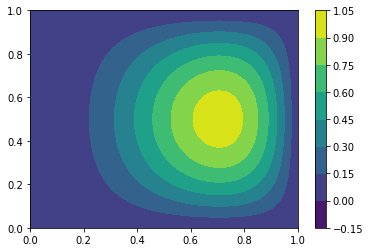

In [14]:
from matplotlib import pyplot as plt
from simplines import plot_field_2d
nbasis = [w.nbasis for w in Vh.spaces]
p1,p2 = Vh.degree
x = un.coeffs._data[p1:-p1,p2:-p2]
u = x.reshape(nbasis)
plot_field_2d(Vh.knots, Vh.degree, u) ; plt.colorbar()